In [56]:
import pandas as pd

In [57]:
songs = pd.read_csv('songs.csv') 
songs = songs.drop_duplicates()
songs.head()       

,Date,Time,Artist,Song,Datetime,Title
0,2024-12-26,00:04,EUROPE,ROCK THE NIGHT,2024-12-26 00:04:00,El decálogo de Mariskal
1,2024-12-26,00:07,FRANZ FERDINAND,DO YOU WANT TO,2024-12-26 00:07:00,El decálogo de Mariskal
2,2024-12-26,00:11,JANIS JOPLIN,PIECE OF MY HEART,2024-12-26 00:11:00,El decálogo de Mariskal
3,2024-12-26,00:15,COLDPLAY,CLOCKS,2024-12-26 00:15:00,El decálogo de Mariskal
4,2024-12-26,00:20,RAMONES,SHEENA IS A PUNK ROCKER,2024-12-26 00:20:00,El decálogo de Mariskal


In [58]:
songs.describe()

,Date,Time,Artist,Song,Datetime,Title
count,2529,2529,2529,2529,2529,2529
unique,8,1230,255,610,2528,10
top,2024-12-25,06:50,AC/DC,SERENADE,2024-12-24 17:37:00,RockFM noche
freq,328,5,43,12,2,866


In [59]:
# Get the number of unique artists
unique_artists_count = songs["Artist"].nunique()
unique_artists_count

255

In [60]:
# Get unique combinations of Artist and Song
unique_songs = songs[["Artist", "Song"]].nunique()
unique_songs

Artist    255
Song      610
dtype: int64

In [61]:
# Group by Artist and Song, then count the occurrences of each combination
combination_counts = (songs.groupby(["Artist", "Song"])
                           .size()
                           .reset_index(name="Count")
                           .sort_values(by="Count", ascending=False))

# Display the result
combination_counts

,Artist,Song,Count
493,T REX,GET IT ON,11
71,BOSTON,MORE THAN A FEELING,9
53,BLUR,COUNTRY HOUSE,9
351,NEW RADICALS,YOU GET WHAT YOU GIVE,9
43,BILLY IDOL,MONY MONY,9
...,...,...,...
42,BILLY IDOL,DANCING WITH MYSELF,1
576,TOM PETTY & HEARTBREAKERS,AMERICAN GIRL,1
613,YOUNG RASCALS,GOOD LOVIN',1
8,AC/DC,STIFF UPPER LIP,1


In [62]:
def song_data(df, artist, song):
    song_df = df[(df['Artist'] == artist) & (df['Song'] == song)]
    song_df_sorted = song_df.sort_values(by=["Date", "Time"], ascending=[True, True])
    return song_df_sorted

In [63]:
song_la_grange = song_data(songs, 'ZZ TOP', 'LA GRANGE')
song_la_grange

,Date,Time,Artist,Song,Datetime,Title
1725,2024-12-21,11:21,ZZ TOP,LA GRANGE,2024-12-21 11:21:00,Rodrigo Garcinuño
1388,2024-12-22,07:45,ZZ TOP,LA GRANGE,2024-12-22 07:45:00,RockFM noche
1518,2024-12-22,17:20,ZZ TOP,LA GRANGE,2024-12-22 17:20:00,RockFM
1221,2024-12-23,19:41,ZZ TOP,LA GRANGE,2024-12-23 19:41:00,RockFM
767,2024-12-24,09:23,ZZ TOP,LA GRANGE,2024-12-24 09:23:00,El Pirata y su banda
624,2024-12-25,22:41,ZZ TOP,LA GRANGE,2024-12-25 22:41:00,RockFM Motel
2165,2024-12-27,19:54,ZZ TOP,LA GRANGE,2024-12-27 19:54:00,RockFM Motel
2348,2024-12-28,10:55,ZZ TOP,LA GRANGE,2024-12-28 10:55:00,Nano Jaquotot


In [64]:
def artist_data(df, artist):
    artist_df = df[df['Artist'] == artist]
    artist_df_sorted = artist_df.sort_values(by=["Date", "Time"], ascending=[True, True])
    return artist_df_sorted

In [65]:
artist_foreigner = artist_data(songs, 'FOREIGNER')
artist_foreigner

,Date,Time,Artist,Song,Datetime,Title
1609,2024-12-21,02:00,FOREIGNER,URGENT,2024-12-21 02:00:00,RockFM noche
1832,2024-12-21,19:02,FOREIGNER,COLD AS ICE,2024-12-21 19:02:00,Nano Jaquotot
1378,2024-12-22,07:03,FOREIGNER,I WANT TO KNOW WHAT LOVE IS,2024-12-22 07:03:00,RockFM noche
1431,2024-12-22,11:03,FOREIGNER,COLD AS ICE,2024-12-22 11:03:00,Rodrigo Garcinuño
1005,2024-12-23,02:54,FOREIGNER,COLD AS ICE,2024-12-23 02:54:00,RockFM noche
715,2024-12-24,04:55,FOREIGNER,URGENT,2024-12-24 04:55:00,RockFM noche
870,2024-12-24,17:21,FOREIGNER,COLD AS ICE,2024-12-24 17:21:00,Nano Jaquotot
347,2024-12-25,02:22,FOREIGNER,URGENT,2024-12-25 02:22:00,RockFM noche
401,2024-12-25,06:10,FOREIGNER,COLD AS ICE,2024-12-25 06:10:00,El Pirata y su banda
187,2024-12-26,14:14,FOREIGNER,COLD AS ICE,2024-12-26 14:14:00,Marta Vázquez


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
unique_days = songs['Date'].nunique()

In [112]:
# Group by 'Song' and count unique days
from seaborn import barplot

# Count the number of times each song by each artist has been played
#play_counts = songs.groupby('Song')['Artist'].nunique()
play_counts = songs.groupby(["Artist", "Song"]).size().reset_index(name='Count')
play_counts = songs.groupby(["Artist", "Song"]).nunique()
print(play_counts)

# Count how many songs were played for each number of days
frequency_count = play_counts.value_counts().sort_index()

#Create a complete index to include all possible values
min_days = frequency_count.index.min()
max_days = frequency_count.index.max()
complete_index = range(min_days, max_days + 1)  # Ensure all numbers between min and max are included

# Reindex frequency_count to include missing values and fill them with 0
frequency_count = frequency_count.reindex(complete_index, fill_value=0)

# Calculate new y-axis limit
y_max = frequency_count.max()
y_limit = y_max + y_max * 0.10  # Increase y-axis by 10%

# Visualize the barplot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=frequency_count.index, y=frequency_count.values, color='blue')
plt.xlabel('Number of Times Played', fontsize=14)

# Get the total and unique songs to calculate the percentage
play_counts_2 = songs.groupby(["Artist", "Song"]).size().reset_index(name="PlayCount")
total_songs = play_counts_2["PlayCount"].sum()
unique_songs = combination_counts.shape[0]

# Set y-axis limit
plt.ylim(0, y_limit)

# Add value and percentage labels on top of each bar
for p in bar_plot.patches:
    height = p.get_height()  # Get the height (count) of each bar
    x = p.get_x() + p.get_width() / 2  # Get the x position for the label
    y = height  # Place the label at the height of the bar
    percentage = (height / unique_songs) * 100  # Calculate the percentage
    bar_plot.text(x, y + 5, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage
    bar_plot.text(x, y, f'({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage

# Plot the barplot
plt.ylabel('Number of Songs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Number of Songs vs. Times Played', fontsize=16)

plt.show()

                                       Date  Time  Datetime  Title
Artist        Song                                                
AC/DC         BACK IN BLACK               3     3         3      3
              HARD AS A ROCK              3     3         3      2
              HELLS BELLS                 2     2         2      2
              HIGH VOLTAGE                1     1         1      1
              HIGHWAY TO HELL             5     5         5      3
...                                     ...   ...       ...    ...
YES           OWNER OF A LONELY HEART     2     2         2      1
YOUNG RASCALS GOOD LOVIN'                 1     1         1      1
ZZ TOP        GIMME ALL YOUR LOVING       6     7         7      4
              LA GRANGE                   7     8         8      6
              TUSH                        4     4         4      3

[617 rows x 4 columns]


TypeError: can only concatenate tuple (not "int") to tuple

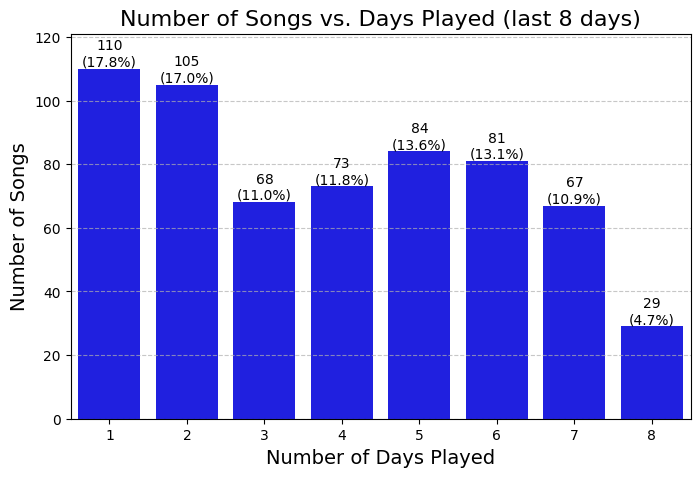

In [101]:
# Group by 'Song' and count unique days
from seaborn import barplot

song_play_count = songs.groupby(["Artist", "Song"])['Date'].nunique()

# Count how many songs were played for each number of days
frequency_count = song_play_count.value_counts().sort_index()

#Create a complete index to include all possible values
min_days = frequency_count.index.min()
max_days = frequency_count.index.max()
complete_index = range(min_days, max_days + 1)  # Ensure all numbers between min and max are included

# Reindex frequency_count to include missing values and fill them with 0
frequency_count = frequency_count.reindex(complete_index, fill_value=0)

# Calculate new y-axis limit
y_max = frequency_count.max()
y_limit = y_max + y_max * 0.10  # Increase y-axis by 10%

# Visualize the barplot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=frequency_count.index, y=frequency_count.values, color='blue')
plt.xlabel('Number of Days Played', fontsize=14)

# Get the total and unique songs to calculate the percentage
play_counts_2 = songs.groupby(["Artist", "Song"]).size().reset_index(name="PlayCount")
total_songs = play_counts_2["PlayCount"].sum()
unique_songs = combination_counts.shape[0]

# Set y-axis limit
plt.ylim(0, y_limit)

# Add value and percentage labels on top of each bar
for p in bar_plot.patches:
    height = p.get_height()  # Get the height (count) of each bar
    x = p.get_x() + p.get_width() / 2  # Get the x position for the label
    y = height  # Place the label at the height of the bar
    percentage = (height / unique_songs) * 100  # Calculate the percentage
    bar_plot.text(x, y + 5, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage
    bar_plot.text(x, y, f'({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage

# Plot the barplot
plt.ylabel('Number of Songs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Number of Songs vs. Days Played (last {unique_days} days)', fontsize=16)

plt.show()